In [4]:
# !pip install opencv-python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/assets/imori_256x256.png')

plt.imshow(img_orig)
plt.show()

<Figure size 640x480 with 1 Axes>

## Q.1. チャネル入れ替え

画像を読み込み、RGBをBGRの順に入れ替えよ。

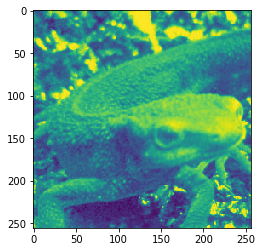

In [91]:
green = img_orig[:, :, 2].copy()
plt.imshow(green)
plt.show()

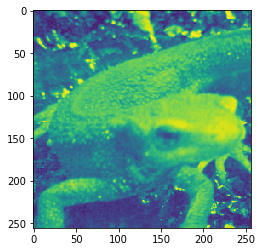

In [92]:
red = img_orig[:, :, 0].copy()
plt.imshow(red)
plt.show()

In [93]:
red.shape

(256, 256)

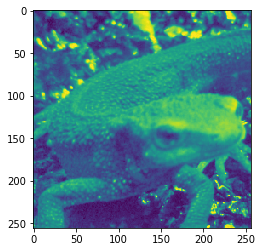

In [94]:
blue = img_orig[:, :, 1].copy()
plt.imshow(blue)
plt.show()

In [95]:
img_orig.shape

(256, 256, 3)

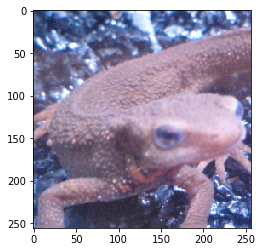

In [96]:
plt.imshow(img_orig)
plt.show()

In [97]:
type(img_orig)

imageio.core.util.Array

In [98]:
img_orig

Array([[[ 46,  81, 137],
        [ 43,  79, 115],
        [ 36,  50,  89],
        ...,
        [ 84,  84, 122],
        [120, 115, 145],
        [148, 144, 169]],

       [[ 69,  92, 134],
        [ 59,  83, 121],
        [ 43,  47,  92],
        ...,
        [ 79,  90, 136],
        [102, 113, 158],
        [119, 132, 177]],

       [[ 74,  94, 144],
        [ 60,  81, 138],
        [ 51,  56, 112],
        ...,
        [104, 111, 165],
        [ 90, 101, 163],
        [ 89, 104, 171]],

       ...,

       [[169, 214, 255],
        [134, 192, 240],
        [ 91, 132, 196],
        ...,
        [ 42,  63, 128],
        [ 37,  62, 116],
        [ 35,  63, 110]],

       [[119, 174, 241],
        [ 96, 149, 219],
        [ 89, 121, 198],
        ...,
        [ 52,  71, 129],
        [ 46,  69, 123],
        [ 43,  69, 120]],

       [[ 96, 137, 201],
        [114, 131, 200],
        [111, 114, 181],
        ...,
        [ 66,  80, 141],
        [ 51,  69, 135],
        [ 52,  71, 140]]

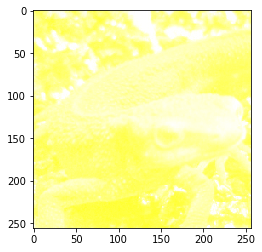

In [99]:
red = np.ones(img_orig.shape, dtype="int64") * 255
red[:, :, 2] = img_orig[:, :, 2].copy()
# red
plt.imshow(red)
plt.show()

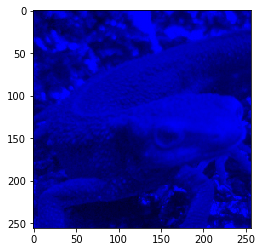

In [100]:
blue = np.zeros(img_orig.shape, dtype="int64")
blue[:, :, 2] = img_orig[:, :, 2].copy()
# blue
plt.imshow(blue)
plt.show()

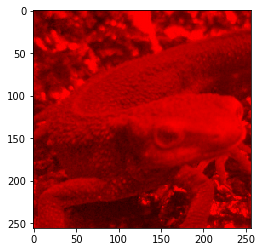

In [101]:
red = np.zeros(img_orig.shape, dtype="int64")
red[:, :, 0] = img_orig[:, :, 2].copy()
# red
plt.imshow(red)
plt.show()

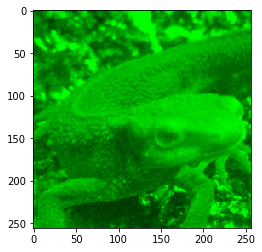

In [102]:
green = np.zeros(img_orig.shape, dtype="uint8")
green[:, :, 1] = img_orig[:, :, 2].copy()
# red
plt.imshow(green)
plt.show()

In [103]:
img_orig[0][0]

Array([ 46,  81, 137], dtype=uint8)

In [104]:
# def rgb_to_bgr(img):
#     bgr = np.zeros(img.shape, dtype="uint8")
#     bgr[:, :, 0] = img[:, :, 2]
#     bgr[:, :, 1] = img[:, :, 1]
#     bgr[:, :, 2] = img[:, :, 0]
#     return bgr

### Q.1.my_ans

In [2]:
def rgb_to_bgr(img):
    bgr = img.copy()
    b = bgr[:, :, 0].copy()
    g = bgr[:, :, 1].copy()
    r = bgr[:, :, 2].copy()
    
    bgr[:, :, 0] = r
    bgr[:, :, 1] = g
    bgr[:, :, 2] = b
    return bgr

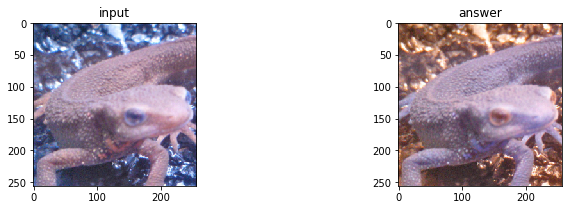

In [4]:
img_bgr = rgb_to_bgr(img_orig)
    
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_bgr)
plt.show()

In [177]:
type(img_bgr)

imageio.core.util.Array

In [178]:
img_bgr[0][0]

Array([137,  81,  46], dtype=uint8)

### Q.1.ans

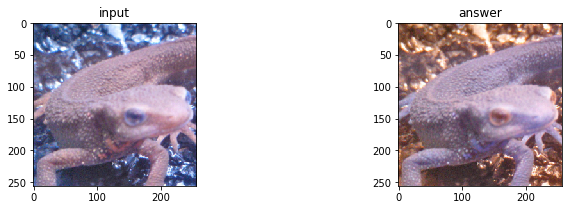

In [3]:
def RGB2BGR(img):
    return img[..., ::-1]

img_bgr = RGB2BGR(img_orig)
    
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_bgr)
plt.show()

### Q.2.ans2

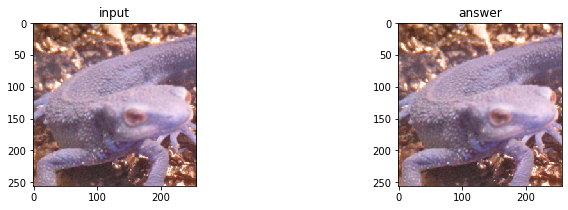

In [116]:
def BGR2RGB(img):
    b = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    r = img[:, :, 2].copy()

    # RGB > BGR
    img[:, :, 0] = r
    img[:, :, 1] = g
    img[:, :, 2] = b

    return img

img_bgr = BGR2RGB(img_orig)
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_bgr)
plt.show()

## Q.2. グレースケール化

画像をグレースケールにせよ。 グレースケールとは、画像の輝度表現方法の一種であり下式で計算される。

Y = 0.2126 R + 0.7152 G + 0.0722 B

In [4]:
def show_img_input_and_answer(img1, img2, cmap = 'viridis'):
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 2, 1)
    plt.title('input')
    plt.imshow(img1)
    plt.subplot(1, 2, 2)
    plt.title('answer')
    plt.imshow(img2, cmap=cmap)
    plt.show()

### Q.2.my_ans

In [5]:
def rgb_to_gray(img):
    b = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    r = img[:, :, 2].copy()
    gray = 0.2126 * r + 0.7152 * g + 0.0722 * b    
    return gray.astype('uint8')

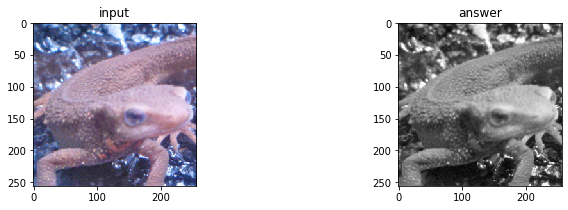

In [8]:
gray = rgb_to_gray(img_orig)
show_img_input_and_answer(img_orig, gray, "gray")

In [184]:
gray.shape

(256, 256)

In [185]:
0.2126 + 0.7152 + 0.0722

1.0

In [186]:
type(gray[0][0])

numpy.uint8

In [188]:
type(gray)

imageio.core.util.Array

### Q.2.opencv

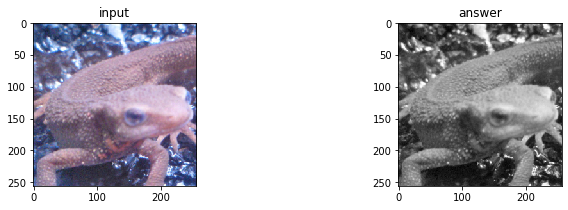

In [6]:
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_gray, cmap='gray')
plt.show()

### Q.2.ans

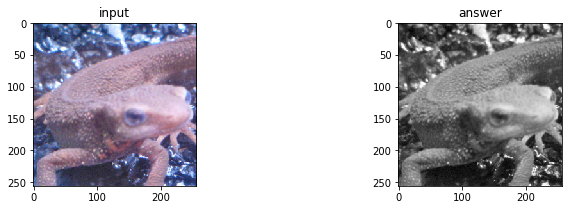

In [6]:
def RGB2GRAY(img):
    _img = img.copy().astype(np.float32)
    gray = _img[..., 0] * 0.2126 + _img[..., 1] * 0.7152 + _img[..., 2] * 0.0722
    gray = np.clip(gray, 0, 255)
    return gray.astype(np.uint8)

img_gray = RGB2GRAY(img_orig)
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_gray, cmap='gray')
plt.show()

### Q.2.ans2

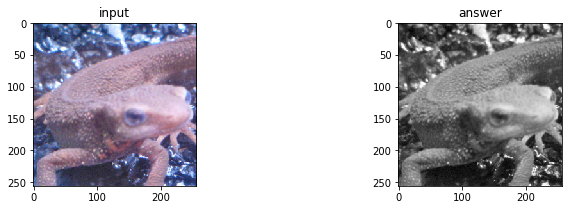

In [166]:
def BGR2GRAY(img):
    b = img[:, :, 0].copy()
    g = img[:, :, 1].copy()
    r = img[:, :, 2].copy()

    # Gray scale
    out = 0.2126 * r + 0.7152 * g + 0.0722 * b
    out = out.astype(np.uint8)

    return out

img_gray = RGB2GRAY(img_orig)
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_gray, cmap='gray')
plt.show()

## Q.3.二値化

画像を二値化せよ。 二値化とは、画像を黒と白の二値で表現する方法である。 ここでは、グレースケールにおいて閾値を128に設定し、下式で二値化する。
```
y = { 0 (if y < 128)
    255 (else) 
```

In [203]:
# def rgb_to_2gray(img):
#     gray = rgb_to_gray(img)

#     def gray_to_2gray(v):
#         if v < 128:
#             return (0)
#         else:
#             return (255)
        
#     for i, r in enumerate(gray):
#         for j, v in enumerate(r):
#             gray[i, j] = gray_to_2gray(v)
    
#     return (gray)

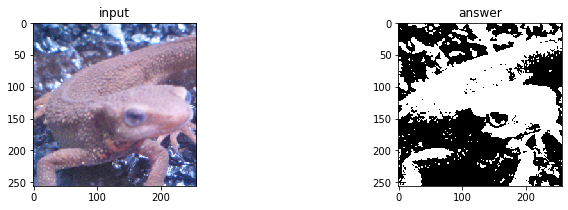

In [204]:
# gray2 = rgb_to_2gray(img_orig)
# show_img_input_and_answer(img_orig, gray2, 'gray')

### Q.3.my_ans

In [7]:
def gray_to_2gray(img, thresh=128):
    return np.minimum(img // thresh, 1) * 255

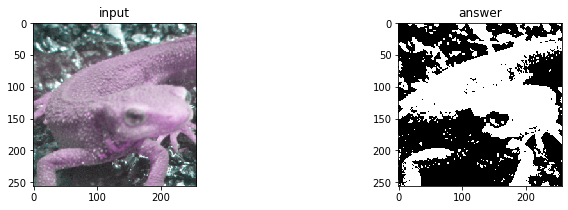

In [26]:
gray = rgb_to_gray(img_orig)
gray2 = gray_to_2gray(gray)
show_img_input_and_answer(img_orig, gray2, 'gray')

In [225]:
type(gray2)

imageio.core.util.Array

In [226]:
type(gray2[0][0])

numpy.uint8

### Q.3.opencv

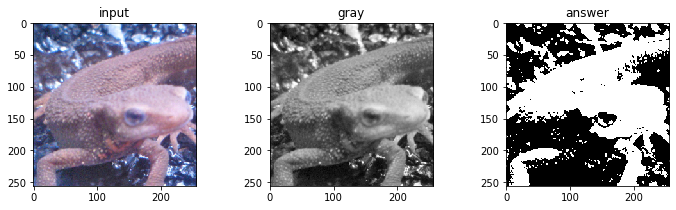

In [9]:
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
th, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 3, 2)
plt.title('gray')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('answer')
plt.imshow(img_bin, cmap='gray')
plt.show()

### Q.3.ans

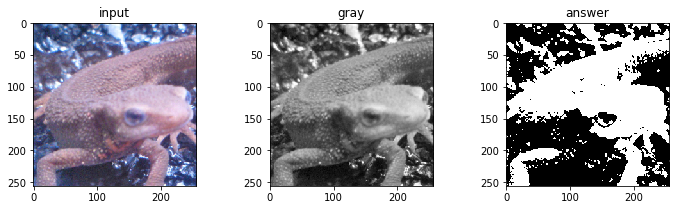

In [8]:
def binary(img, th):
    _img = img.copy()
    _img = np.minimum(_img // th, 1) * 255
    return _img.astype(np.uint8)

img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
img_bin = binary(img_gray, 127)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 3, 2)
plt.title('gray')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('answer')
plt.imshow(img_bin, cmap='gray')
plt.show()

### Q.3.ans2

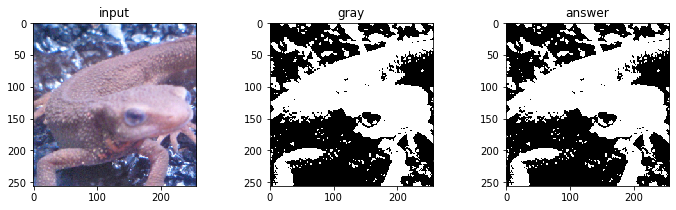

In [235]:
def binarization(img, th=128):
    img[img < th] = 0
    img[img >= th] = 255
    return img

img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
img_bin = binarization(img_gray)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 3, 2)
plt.title('gray')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('answer')
plt.imshow(img_bin, cmap='gray')
plt.show()

## Q.4.大津の二値化

大津の二値化を実装せよ。 大津の二値化とは判別分析法と呼ばれ、二値化における分離の閾値を自動決定する手法である。 これはクラス内分散とクラス間分散の比から計算される。

グレースケールの輝度値（ピクセルの値）のヒストグラムはこうなる。

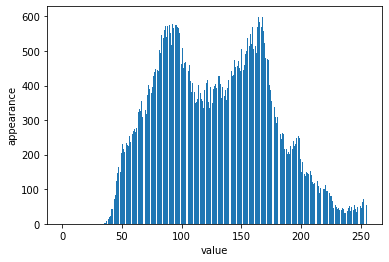

In [17]:
import cv2
import matplotlib.pyplot as plt
img = img_orig
gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
plt.hist(gray.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.xlabel('value')
plt.ylabel('appearance')
plt.show()


二値化はある値を境界にして、０か１にする方法だけど、大津の二値化は閾値を自動的に決定する方法である。ここでは閾値によって分離される画素をそれぞれクラス0,1とする。



ある閾値tによって、クラス0と1が上手く分離できれば良い二値化と言える。ということで、クラス0と1の分離度を定義する。

 ... クラス0, 1に属する画素数

 ... クラス0, 1に属する画素値の分散

 ... クラス0, 1に属する画素値の平均値

 ... 画像全体の画素値の平均値

 ... クラス0, 1に属する画素値の合計値

とすると、

クラス0,1の分散の重み付き和を示すクラス内分散は次式となる。



クラス0,1の平均値が画像全体の平均からどれだけ離れているかを示すクラス間分散は次式となる。



分離の度合いはクラス内分散が小さく、かつクラス間分散が大きくなるように定義される。（クラス分類と同様の考え方）



画像全体の画素の分散はクラス内分散とクラス間分散の和となる。



よって分離度Xは次式で定義される。



この分離度が最大となれば良くて、つまりクラス間分散が最大になれば良い。



つまり、閾値を[0, 255]の各値でクラス間分散を計算し、最大になる閾値が最適な閾値である。

In [279]:
thresh_list = np.array([i for i in range(256)])

In [280]:
len(thresh_list)

256

In [281]:
gray = rgb_to_gray(img_orig)

In [282]:
flat_img = gray.flatten()
flat_img

Array([90, 84, 57, ..., 91, 81, 84], dtype=uint8)

In [283]:
count_class0 = np.array([np.sum(flat_img < thresh) for thresh in thresh_list])
count_class0[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [284]:
count_class1 = flat_img.shape[0] - count_class0
count_class1[:20]

array([65536, 65536, 65536, 65536, 65536, 65536, 65536, 65536, 65536,
       65536, 65536, 65536, 65536, 65536, 65536, 65536, 65536, 65536,
       65536, 65536])

In [253]:
# num_class0 = np.array([flat_img[flat_img < thresh].() for thresh in thresh_list])
# num_class0[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

In [254]:
# sum_pixel = flat_img.sum()
# sum_pixel

8449840

In [255]:
# num_class1 = sum_pixel - num_class0
# num_class1[:10]

array([8449840, 8449840, 8449840, 8449840, 8449840, 8449840, 8449840,
       8449840, 8449840, 8449840], dtype=uint32)

In [285]:
flat_img.shape[0]

65536

In [286]:
avg_class0 = np.array([flat_img[flat_img < thresh].mean() for thresh in thresh_list])
avg_class0[:20]

C:\Users\suzuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice.
  """Entry point for launching an IPython kernel.


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])

In [287]:
avg_class1 = np.array([flat_img[flat_img >= thresh].mean() for thresh in thresh_list])
avg_class1[:20]

C:\Users\suzuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice.
  """Entry point for launching an IPython kernel.


array([128.93432617, 128.93432617, 128.93432617, 128.93432617,
       128.93432617, 128.93432617, 128.93432617, 128.93432617,
       128.93432617, 128.93432617, 128.93432617, 128.93432617,
       128.93432617, 128.93432617, 128.93432617, 128.93432617,
       128.93432617, 128.93432617, 128.93432617, 128.93432617])

In [288]:
len(count_class0)

256

In [276]:
dist_bet_classes = (avg_class0 - avg_class1) ** 2
dist_bet_classes *= count_class0
dist_bet_classes *= count_class1
dist_bet_classes /= (count_class0 + count_class1)
dist_bet_classes /= (count_class0 + count_class1)
# dist_bet_classes = (avg_class0 - avg_class1) ** 2 * count_class0 * count_class1 / (count_class0 + count_class1) ** 2

dist_bet_classes

array([           nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
       4.03933482e-01, 7.99326108e-01, 1.96027263e+00, 3.72765061e+00,
       6.07476705e+00, 8.85465104e+00, 1.39403829e+01, 1.88013581e+01,
       2.69574374e+01, 3.60523470e+01, 4.94171050e+01, 6.49697805e+01,
       8.21029999e+01, 9.75697589e+01, 1.18165080e+02, 1.40852673e+02,
       1.61672425e+02, 1.81336184e+02, 2.03142193e+02, 2.24077925e+02,
      

In [277]:
dist_bet_classes = np.nan_to_num(dist_bet_classes)
dist_bet_classes

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.03933482e-01, 7.99326108e-01, 1.96027263e+00, 3.72765061e+00,
       6.07476705e+00, 8.85465104e+00, 1.39403829e+01, 1.88013581e+01,
       2.69574374e+01, 3.60523470e+01, 4.94171050e+01, 6.49697805e+01,
       8.21029999e+01, 9.75697589e+01, 1.18165080e+02, 1.40852673e+02,
       1.61672425e+02, 1.81336184e+02, 2.03142193e+02, 2.24077925e+02,
      

In [278]:
index = np.argmax(dist_bet_classes)
index

130

In [217]:
len(dist_bet_classes)

256

### Q.4.my_ans

In [9]:
def otsu_thresh(img):
    thresh_list = np.array([i for i in range(256)])
    w0 = np.array([np.sum(img < thresh) for thresh in thresh_list])
    w1 = img.size - count_class0
    m0 = np.array([img[img < thresh].mean() for thresh in thresh_list])
    m1 = np.array([img[img >= thresh].mean() for thresh in thresh_list])
    dist_bet_classes = (m0 - m1) ** 2 * w0 * w1 / (w0 + w1) / (w0 + w1)
    dist_bet_classes = np.nan_to_num(dist_bet_classes)
    max_th = np.argmax(dist_bet_classes)
    binary_img = gray_to_2gray(img, max_th)
    return max_th, binary_img

C:\Users\suzuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
C:\Users\suzuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice.
  


130


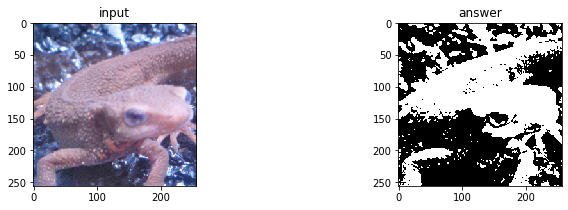

In [309]:
gray = rgb_to_gray(img_orig)
th, binary_img = otsu_thresh(gray)
print(th)
show_img_input_and_answer(img_orig, binary_img, cmap='gray')

### Q.4.opencv

threshold >> 129.0


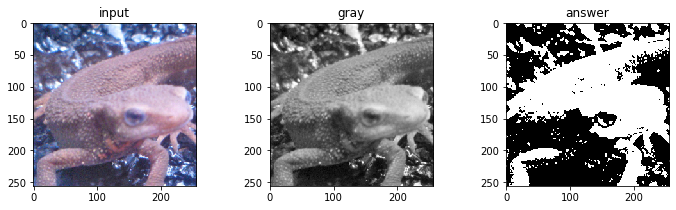

In [310]:
th, img_bin = cv2.threshold(img_gray, 0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('threshold >>', th)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 3, 2)
plt.title('gray')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('answer')
plt.imshow(img_bin, cmap='gray')
plt.show()

### Q.4.ans

C:\Users\suzuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """


threshold >> 129


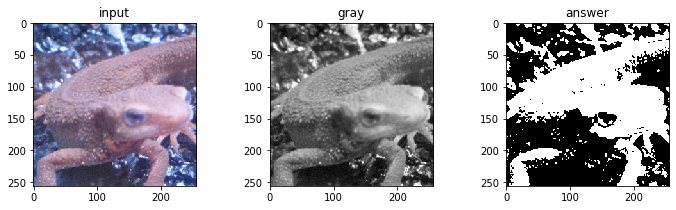

In [311]:
def otsu_thresh(img):
    max_vari = -1
    max_th = 0
    for th in range(1, 254):
        m0 = img[img <= th].mean() # mean class 0
        m1 = img[img > th].mean() # mean class 1
        w0 = img[img <= th].size # pixel num class 0
        w1 = img[img > th].size # pixel num class 1
        vari = w0 * w1 / ((w0 + w1) ** 2) * ((m0 - m1) ** 2) # inter class variance
        if vari > max_vari:
            max_th = th
            max_vari = vari
            
    img = binary(img, max_th)
            
    return max_th, img

th, img_bin = otsu_thresh(img_gray)
print('threshold >>', th)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 3, 2)
plt.title('gray')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('answer')
plt.imshow(img_bin, cmap='gray')
plt.show()

### Q.4.ans2

threshold >> 1


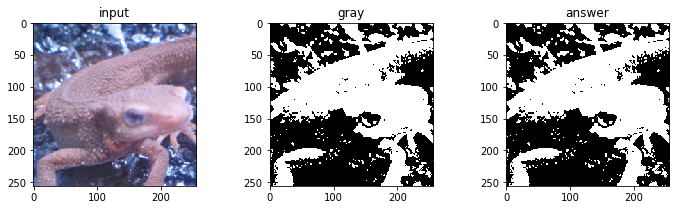

In [318]:
def otsu_binarization(img):
	max_sigma = 0
	max_t = 0
	H, W = img.shape
	# determine threshold
	for _t in range(1, 256):
		v0 = img[np.where(img < _t)]
		m0 = np.mean(v0) if len(v0) > 0 else 0.
		w0 = len(v0) / (H * W)
		v1 = img[np.where(img >= _t)]
		m1 = np.mean(v1) if len(v1) > 0 else 0.
		w1 = len(v1) / (H * W)
		sigma = w0 * w1 * ((m0 - m1) ** 2)
		if sigma > max_sigma:
			max_sigma = sigma
			max_t = _t

	# Binarization
	print("threshold >>", max_t)
	th = max_t
	img[img < th] = 0
	img[img >= th] = 255

	return img

# Otsu's binarization
out = otsu_binarization(img_gray)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 3, 2)
plt.title('gray')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('answer')
plt.imshow(out, cmap='gray')
plt.show()

## Q.5.HSV変換

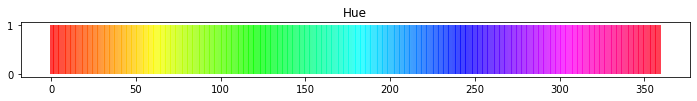

In [12]:
from matplotlib import cm
plt.figure(figsize=(12, 1))
plt.title('Hue')
for i in range(360):
    plt.vlines(i, 0, 1, color=cm.hsv(i / 360))
plt.show()

HSV変換を実装して、色相Hを反転せよ。

HSV変換とは、Hue(色相)、Saturation(彩度)、Value(明度) で色を表現する手法である。

Hue ... 色合いを0~360度で表現し、赤や青など色の種類を示す。 ( 0 <= H < 360) 色相は次の色に対応する。
赤 黄色  緑  水色  青  紫   赤
0  60  120  180 240 300 360
Saturation ... 色の鮮やかさ。Saturationが低いと灰色さが顕著になり、くすんだ色となる。 ( 0<= S < 1)
Value ... 色の明るさ。Valueが高いほど白に近く、Valueが低いほど黒に近くなる。 ( 0 <= V < 1)
RGB -> HSV変換は以下の式で定義される。

R,G,Bが[0, 1]の範囲にあるとする。

Max = max(R,G,B)
Min = min(R,G,B)

H =  { 0                            (if Min=Max)
       60 x (G-R) / (Max-Min) + 60  (if Min=B)
       60 x (B-G) / (Max-Min) + 180 (if Min=R)
       60 x (R-B) / (Max-Min) + 300 (if Min=G)
       
V = Max

S = Max - Min
HSV -> RGB変換は以下の式で定義される。

C = S

H' = H / 60

X = C (1 - |H' mod 2 - 1|)

(R,G,B) = (V - C) (1,1,1) + { (0, 0, 0)  (if H is undefined)
                              (C, X, 0)  (if 0 <= H' < 1)
                              (X, C, 0)  (if 1 <= H' < 2)
                              (0, C, X)  (if 2 <= H' < 3)
                              (0, X, C)  (if 3 <= H' < 4)
                              (X, 0, C)  (if 4 <= H' < 5)
                              (C, 0, X)  (if 5 <= H' < 6)

In [16]:
10%5

0

In [24]:
vmax = np.maximum(img_orig[:, :, 0], img_orig[:, :, 1], img_orig[:, :, 2])
vmax

Array([[ 81,  79,  50, ...,  84, 120, 148],
       [ 92,  83,  47, ...,  90, 113, 132],
       [ 94,  81,  56, ..., 111, 101, 104],
       ...,
       [214, 192, 132, ...,  63,  62,  63],
       [174, 149, 121, ...,  71,  69,  69],
       [137, 131, 114, ...,  80,  69,  71]], dtype=uint8)

In [19]:
vmin = np.minimum(img_orig[:, :, 0], img_orig[:, :, 1], img_orig[:, :, 2])
vmin

Array([[ 46,  43,  36, ...,  84, 115, 144],
       [ 69,  59,  43, ...,  79, 102, 119],
       [ 74,  60,  51, ..., 104,  90,  89],
       ...,
       [169, 134,  91, ...,  42,  37,  35],
       [119,  96,  89, ...,  52,  46,  43],
       [ 96, 114, 111, ...,  66,  51,  52]], dtype=uint8)

In [28]:
3.5 % 2

1.5

In [29]:
img_orig[:10]

Array([[[ 46,  81, 137],
        [ 43,  79, 115],
        [ 36,  50,  89],
        ...,
        [ 84,  84, 122],
        [120, 115, 145],
        [148, 144, 169]],

       [[ 69,  92, 134],
        [ 59,  83, 121],
        [ 43,  47,  92],
        ...,
        [ 79,  90, 136],
        [102, 113, 158],
        [119, 132, 177]],

       [[ 74,  94, 144],
        [ 60,  81, 138],
        [ 51,  56, 112],
        ...,
        [104, 111, 165],
        [ 90, 101, 163],
        [ 89, 104, 171]],

       ...,

       [[ 61,  79, 125],
        [ 65,  96, 143],
        [ 80, 100, 151],
        ...,
        [ 45, 102, 183],
        [ 69,  85, 163],
        [ 85,  62, 134]],

       [[ 61,  92, 139],
        [ 76, 104, 151],
        [ 90, 115, 156],
        ...,
        [ 63,  98, 156],
        [ 68,  78, 140],
        [ 72,  63, 128]],

       [[ 67,  88, 145],
        [ 73,  94, 151],
        [ 90, 112, 162],
        ...,
        [ 85,  95, 146],
        [ 69,  81, 133],
        [ 63,  76, 128]]

In [162]:
def rgb_to_hsv(img):
    hsv = img.copy()
    bl = hsv[:, :, 0].copy()
    gl = hsv[:, :, 1].copy()
    rl = hsv[:, :, 2].copy()
    
    hsv.astype('float32')
    
    def r2h(r, g, b, mi, ma):
        if mi == ma:
            return 0
        elif b == mi:
            return 60 * (g - r) / (ma - mi) + 60
        elif r == mi:
            return 60 * (b - g) / (ma - mi) + 180
        else:
            return 60 * (g - b) / (ma - mi) + 300
    
    vmax = np.maximum(bl, np.maximum(gl, rl))
    vmin = np.minimum(bl, np.minimum(gl, rl))
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            hsv[i][j][0] = r2h(rl[i][j], gl[i][j], bl[i][j], vmin[i][j], vmax[i][j])
    
    hsv[:, :, 1] = (vmax - vmin).astype('float32') / 255
    hsv[:, :, 2] = vmax.astype('float32') / 255
    return hsv

In [157]:
hsv = img_orig.copy()

In [149]:
bl = hsv[:, :, 0].copy()
gl = hsv[:, :, 1].copy()
rl = hsv[:, :, 2].copy()

In [150]:
vmax = np.maximum(bl, np.maximum(gl, rl))
vmin = np.minimum(bl, np.minimum(gl, rl))

In [151]:
def r2h(r, g, b, mi, ma):
    if mi == ma:
        return 0
    elif b == mi:
        return 60 * (g - r) / (ma - mi) + 60
    elif r == mi:
        return 60 * (b - g) / (ma - mi) + 180
    else:
        return 60 * (g - b) / (ma - mi) + 300

In [152]:
r2h(rl[20][20], gl[20][20], bl[20][20], vmin[20][20], vmax[20][20])

C:\Users\suzuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """


301.0909090909091

In [132]:
(vmin == vmax)[20]

Array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [147]:
img_hsv = rgb_to_hsv(img_orig)

C:\Users\suzuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
C:\Users\suzuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\suzuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app


In [105]:
np.apply_along_axis(lambda x: print(x[0], x[1], x[2]), 0, [[0, 1, 2], [3, 4, 5], [6, 7, 8]])

0 3 6
1 4 7
2 5 8


array([None, None, None], dtype=object)

In [106]:
20 / 255

0.0784313725490196

C:\Users\suzuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
C:\Users\suzuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\suzuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  from ipykernel import kernelapp as app


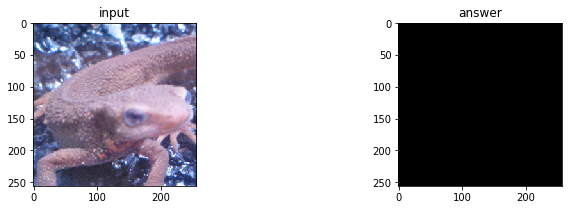

In [163]:
img_hsv = rgb_to_hsv(img_orig)
img_temp = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB) # HSV -> RGB
show_img_input_and_answer(img_orig, img_temp)

In [155]:
img_hsv

Array([[[191,   0,   0],
        [243,   0,   0],
        [ 49,   0,   0],
        ...,
        [148,   0,   0],
        [ 34,   0,   0],
        [136,   0,   0]],

       [[  1,   0,   0],
        [ 14,   0,   0],
        [ 62,   0,   0],
        ...,
        [ 25,   0,   0],
        [ 30,   0,   0],
        [ 22,   0,   0]],

       [[236,   0,   0],
        [213,   0,   0],
        [  0,   0,   0],
        ...,
        [  2,   0,   0],
        [219,   0,   0],
        [198,   0,   0]],

       ...,

       [[210,   0,   1],
        [177,   0,   0],
        [169,   0,   0],
        ...,
        [193,   0,   0],
        [213,   0,   0],
        [227,   0,   0]],

       [[152,   0,   0],
        [150,   0,   0],
        [158,   0,   0],
        ...,
        [214,   0,   0],
        [217,   0,   0],
        [219,   0,   0]],

       [[169,   0,   0],
        [190,   0,   0],
        [222,   0,   0],
        ...,
        [216,   0,   0],
        [195,   0,   0],
        [187,   0,   0]]

In [139]:
img_temp.shape

(256, 256, 3)

In [140]:
img_hsv[:20]

Array([[[  0,   0,  46],
        [  0,   0,  43],
        [  0,   0,  36],
        ...,
        [  0,   0,  84],
        [  0,   0, 115],
        [  0,   0, 144]],

       [[  0,   0,  69],
        [  0,   0,  59],
        [  0,   0,  43],
        ...,
        [  0,   0,  79],
        [  0,   0, 102],
        [  0,   0, 119]],

       [[  0,   0,  74],
        [  0,   0,  60],
        [  0,   0,  51],
        ...,
        [  0,   0, 104],
        [  0,   0,  90],
        [  0,   0,  89]],

       ...,

       [[  0,   0,  88],
        [  0,   0,  66],
        [  0,   0,  54],
        ...,
        [  0,   0, 143],
        [  0,   0, 131],
        [  0,   0, 119]],

       [[  0,   0,  99],
        [  0,   0,  72],
        [  0,   0,  59],
        ...,
        [  0,   0, 132],
        [  0,   0, 125],
        [  0,   0, 127]],

       [[  0,   0, 100],
        [  0,   0,  81],
        [  0,   0,  64],
        ...,
        [  0,   0, 133],
        [  0,   0, 136],
        [  0,   0, 148]]

In [81]:
#     hsv[:, :, 0] = np.apply_along_axis(lambda x: r2h(x[0], x[1], x[2], x[3], x[4]),  0, [rl, gl, bl, vmin, vmax]) / 360


Array([[[0.        , 0.        , 0.18039216],
        [0.        , 0.        , 0.16862745],
        [0.        , 0.        , 0.14117647],
        ...,
        [0.        , 0.        , 0.32941176],
        [0.        , 0.        , 0.45098039],
        [0.        , 0.        , 0.56470588]],

       [[0.        , 0.        , 0.27058824],
        [0.        , 0.        , 0.23137255],
        [0.        , 0.        , 0.16862745],
        ...,
        [0.        , 0.        , 0.30980392],
        [0.        , 0.        , 0.4       ],
        [0.        , 0.        , 0.46666667]],

       [[0.        , 0.        , 0.29019608],
        [0.        , 0.        , 0.23529412],
        [0.        , 0.        , 0.2       ],
        ...,
        [0.        , 0.        , 0.40784314],
        [0.        , 0.        , 0.35294118],
        [0.        , 0.        , 0.34901961]],

       ...,

       [[0.        , 0.        , 0.6627451 ],
        [0.        , 0.        , 0.5254902 ],
        [0.        , 0

In [112]:
img_hsv

Array([[[0.        , 0.        , 0.18039216],
        [0.        , 0.        , 0.16862745],
        [0.        , 0.        , 0.14117647],
        ...,
        [0.        , 0.        , 0.32941176],
        [0.        , 0.        , 0.45098039],
        [0.        , 0.        , 0.56470588]],

       [[0.        , 0.        , 0.27058824],
        [0.        , 0.        , 0.23137255],
        [0.        , 0.        , 0.16862745],
        ...,
        [0.        , 0.        , 0.30980392],
        [0.        , 0.        , 0.4       ],
        [0.        , 0.        , 0.46666667]],

       [[0.        , 0.        , 0.29019608],
        [0.        , 0.        , 0.23529412],
        [0.        , 0.        , 0.2       ],
        ...,
        [0.        , 0.        , 0.40784314],
        [0.        , 0.        , 0.35294118],
        [0.        , 0.        , 0.34901961]],

       ...,

       [[0.        , 0.        , 0.6627451 ],
        [0.        , 0.        , 0.5254902 ],
        [0.        , 0

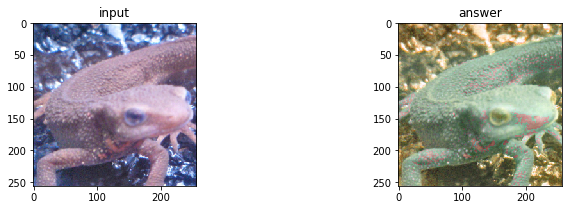

In [93]:
# opencv
hsv = cv2.cvtColor(img_orig, cv2.COLOR_RGB2HSV) # RGB -> HSV
hsv[..., 0] = (hsv[..., 0] + 90) % 180 # Hue of opencv is defined [0, 180]
img_hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB) # HSV -> RGB
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_hsv)
plt.show()

In [110]:
hsv.shape

(256, 256, 3)

In [10]:
hsv = cv2.cvtColor(img_orig, cv2.COLOR_RGB2HSV) # RGB -> HSV

In [11]:
hsv[:30]

array([[[108, 169, 137],
        [105, 160, 115],
        [112, 152,  89],
        ...,
        [120,  79, 122],
        [125,  53, 145],
        [125,  38, 169]],

       [[109, 124, 134],
        [108, 131, 121],
        [118, 136,  92],
        ...,
        [114, 107, 136],
        [114,  90, 158],
        [113,  84, 177]],

       [[111, 124, 144],
        [112, 144, 138],
        [118, 139, 112],
        ...,
        [117,  94, 165],
        [115, 114, 163],
        [115, 122, 171]],

       ...,

       [[108, 158, 136],
        [108, 158, 136],
        [109, 154, 141],
        ...,
        [161,  48, 142],
        [163,  50, 139],
        [165,  48, 137]],

       [[105, 158, 124],
        [108, 153, 128],
        [109, 150, 129],
        ...,
        [155,  49, 146],
        [156,  48, 148],
        [157,  45, 143]],

       [[106, 149, 125],
        [107, 159, 127],
        [107, 158, 129],
        ...,
        [158,  50, 163],
        [158,  49, 165],
        [154,  49, 156]]

In [40]:
def rgb_to_hsv(img):
    hsv = img.copy()
    bl = hsv[:, :, 0].copy()
    gl = hsv[:, :, 1].copy()
    rl = hsv[:, :, 2].copy()
    
    vmax = np.maximum(bl, np.maximum(gl, rl))
    vmin = np.minimum(bl, np.minimum(gl, rl))
    
    max_equal_min = (vmax == vmin)
    diff = np.maximum((vmax - vmin).astype('float'), 1e-10)
    
    index = (max_equal_min == False) * (gl == vmin)
    hsv[:, :, 0][index] = 60 * (rl - bl).astype('float')[index] / diff[index] + 300
    index = (max_equal_min == False) * (rl == vmin)
    hsv[:, :, 0][index] = 60 * (bl - gl).astype('float')[index] / diff[index] + 180
    index = (max_equal_min == False) * (bl == vmin)
    hsv[:, :, 0][index] = 60 * (gl - rl).astype('float')[index] / diff[index] + 60
    index = max_equal_min
    hsv[:, :, 0][index] = 0
    
    hsv[:, :, 1] = vmax - vmin
    hsv[:, :, 2] = vmax
    return hsv

In [41]:
my_hsv = rgb_to_hsv(img_orig)

In [42]:
my_hsv[:30]

Array([[[191,  91, 137],
        [243,  72, 115],
        [ 49,  53,  89],
        ...,
        [148,  38, 122],
        [ 94,  30, 145],
        [ 94,  25, 169]],

       [[  1,  65, 134],
        [ 14,  62, 121],
        [ 62,  49,  92],
        ...,
        [ 25,  57, 136],
        [ 30,  56, 158],
        [ 22,  58, 177]],

       [[236,  70, 144],
        [213,  78, 138],
        [  0,  61, 112],
        ...,
        [  2,  61, 165],
        [219,  73, 163],
        [198,  82, 171]],

       ...,

       [[206,  84, 136],
        [206,  84, 136],
        [202,  85, 141],
        ...,
        [ 78,  27, 142],
        [ 74,  27, 139],
        [ 92,  26, 137]],

       [[229,  77, 124],
        [223,  77, 128],
        [224,  76, 129],
        ...,
        [ 69,  28, 146],
        [ 67,  28, 148],
        [132,  25, 143]],

       [[239,  73, 125],
        [220,  79, 127],
        [217,  80, 129],
        ...,
        [251,  32, 163],
        [253,  32, 165],
        [ 36,  30, 156]]

In [10]:
vmax = np.maximum(img_orig[:, :, 0], np.maximum(img_orig[:, :, 1], img_orig[:, :, 2]))
vmax

Array([[137, 115,  89, ..., 122, 145, 169],
       [134, 121,  92, ..., 136, 158, 177],
       [144, 138, 112, ..., 165, 163, 171],
       ...,
       [255, 240, 196, ..., 128, 116, 110],
       [241, 219, 198, ..., 129, 123, 120],
       [201, 200, 181, ..., 141, 135, 140]], dtype=uint8)

In [11]:
vmin = np.minimum(img_orig[:, :, 0], np.minimum(img_orig[:, :, 1], img_orig[:, :, 2]))
vmin

Array([[ 46,  43,  36, ...,  84, 115, 144],
       [ 69,  59,  43, ...,  79, 102, 119],
       [ 74,  60,  51, ..., 104,  90,  89],
       ...,
       [169, 134,  91, ...,  42,  37,  35],
       [119,  96,  89, ...,  52,  46,  43],
       [ 96, 114, 111, ...,  66,  51,  52]], dtype=uint8)

In [16]:
max_equal_min = (vmax == vmin)
max_equal_min

Array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [137]:
sum((hsv - my_hsv)[:, :, 1])

Array([  0,   2,   0,   0,   2, 254,   0,   1,   2,   2,   3,   1,   2,
         1,   1,   3,   1,   2,   3, 255,   5,   3,   3, 254,   1,   1,
         1,   0,   2,   3,   2,   3,   4,   3, 255,   3,   0,   2,   0,
         2,   1,   1, 255,   4,   1,   0,   6,   0,   2,   1,   2,   0,
         8,   2, 255,   4,   5,   2,   0,   0,   2,   3,   3,   3,   2,
         0,   2,   1,   4,   2,   2,   0,   2,   2,   2,   2,   2,   3,
         0, 255,   2,   2,   4,   2,   2,   2,   2,   1,   2,   1,   1,
         5,   1,   4,   2,   2,   5,   3,   4,   3,   2,   2,   2,   3,
         2,   0,   2,   1,   2, 255,   4,   0,   2,   1,   3,   1,   1,
         5,   4,   0,   1,   1,   2,   0,   4,   3,   0,   2,   2,   3,
         4,   2,   1,   1,   0,   2,   4,   2,   3,   1,   1,   2,   2,
         6,   1,   2,   2,   2,   1,   1,   1,   3,   2,   6, 255,   2,
         0,   0,   2,   2,   1,   2,   1,   1,   2,   4,   1,   2,   2,
         2,   1,   4,   2,   0,   3,   0,   3,   3,   1,   1,   

In [146]:
len((hsv - my_hsv)[:, :, 1][(hsv - my_hsv)[:, :, 1] > 0])

659

In [147]:
(hsv - my_hsv)[:, :, 1][(hsv - my_hsv)[:, :, 1] > 0]

Array([255,   1,   1, 255,   1, 255, 255,   1,   1,   1, 255, 255, 255,
       255, 255, 255, 255, 255,   1, 255, 255, 255,   1, 255,   1,   1,
         1, 255,   1,   1, 255,   1, 255,   1,   1, 255, 255, 255,   1,
         1,   1, 255,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1, 255,   1, 255,   1,   1, 255,   1,   1, 255,
       255, 255,   1,   1,   1,   1, 255,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1, 255, 255,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1, 255,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1, 255, 255,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1, 255, 255, 255, 255,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1, 255,   1,   1,   1, 255,   1,   1,   1,   

In [53]:
np.array([1.8]).astype('uint8')

array([1], dtype=uint8)

In [117]:
3 / 2

1.5

In [24]:
not True

False

In [25]:
False == False

True

In [10]:
def rgb_to_hsv(img):
    hsv = img.copy().astype('uint16')
    rl = hsv[:, :, 0].copy()
    gl = hsv[:, :, 1].copy()
    bl = hsv[:, :, 2].copy()
    
    vmax = np.maximum(bl, np.maximum(gl, rl))
    vmin = np.minimum(bl, np.minimum(gl, rl))
    
    max_equal_min = (vmax == vmin)
    diff = np.maximum((vmax - vmin).astype('float32'), 1e-10)
    
    index = (max_equal_min == False) * (gl == vmin)
    hsv[:, :, 0][index] = 60 * (rl - bl).astype('float32')[index] / diff[index] + 300
    index = (max_equal_min == False) * (rl == vmin)
    hsv[:, :, 0][index] = 60 * (bl - gl).astype('float32')[index] / diff[index] + 180
    index = (max_equal_min == False) * (bl == vmin)
    hsv[:, :, 0][index] = 60 * (gl - rl).astype('float32')[index] / diff[index] + 60
    index = max_equal_min
    hsv[:, :, 0][index] = 0
    
    hsv[:, :, 1] = vmax - vmin
    hsv[:, :, 2] = vmax
    return hsv

In [127]:
img_hsv = rgb_to_hsv(img_orig)

In [117]:
img_hsv[:, :, 0] = img_hsv[:, :, 0] + 128

In [19]:
img_hsv

Array([[[ 63,  91, 137],
        [115,  72, 115],
        [177,  53,  89],
        ...,
        [ 20,  38, 122],
        [222,  30, 145],
        [222,  25, 169]],

       [[129,  65, 134],
        [142,  62, 121],
        [190,  49,  92],
        ...,
        [153,  57, 136],
        [158,  56, 158],
        [150,  58, 177]],

       [[108,  70, 144],
        [ 85,  78, 138],
        [128,  61, 112],
        ...,
        [130,  61, 165],
        [ 91,  73, 163],
        [ 70,  82, 171]],

       ...,

       [[ 82,  86, 255],
        [ 49, 106, 240],
        [ 41, 105, 196],
        ...,
        [ 65,  86, 128],
        [ 85,  79, 116],
        [ 99,  75, 110]],

       [[ 24, 122, 241],
        [ 22, 123, 219],
        [ 30, 109, 198],
        ...,
        [ 86,  77, 129],
        [ 89,  77, 123],
        [ 91,  77, 120]],

       [[ 41, 105, 201],
        [ 62,  86, 200],
        [ 94,  70, 181],
        ...,
        [ 88,  75, 141],
        [ 67,  84, 135],
        [ 59,  88, 140]]

In [20]:
img_hsv

Array([[[ 63,  91, 137],
        [115,  72, 115],
        [177,  53,  89],
        ...,
        [ 20,  38, 122],
        [222,  30, 145],
        [222,  25, 169]],

       [[129,  65, 134],
        [142,  62, 121],
        [190,  49,  92],
        ...,
        [153,  57, 136],
        [158,  56, 158],
        [150,  58, 177]],

       [[108,  70, 144],
        [ 85,  78, 138],
        [128,  61, 112],
        ...,
        [130,  61, 165],
        [ 91,  73, 163],
        [ 70,  82, 171]],

       ...,

       [[ 82,  86, 255],
        [ 49, 106, 240],
        [ 41, 105, 196],
        ...,
        [ 65,  86, 128],
        [ 85,  79, 116],
        [ 99,  75, 110]],

       [[ 24, 122, 241],
        [ 22, 123, 219],
        [ 30, 109, 198],
        ...,
        [ 86,  77, 129],
        [ 89,  77, 123],
        [ 91,  77, 120]],

       [[ 41, 105, 201],
        [ 62,  86, 200],
        [ 94,  70, 181],
        ...,
        [ 88,  75, 141],
        [ 67,  84, 135],
        [ 59,  88, 140]]

In [39]:
def hsv_to_rgb(hsv):
    img = hsv.copy()
    h = img[:, :, 0].copy()
    s = img[:, :, 1].copy()
    v = img[:, :, 2].copy()
    
    h2 = h / 60
    x = (s * (1 - np.abs(h2 % 2 - 1)))
    
    img[:, :, 0] = v - s
    img[:, :, 1] = v - s
    img[:, :, 2] = v - s
    
    index = (h2 < 1)
    img[:, :, 0][index] += s[index]
    img[:, :, 1][index] += x[index]
    index = (1 <= h2) * (h2 < 2)
    img[:, :, 0][index] += x[index]
    img[:, :, 1][index] += s[index]
    index = (2 <= h2) * (h2 < 3)
    img[:, :, 1][index] += s[index]
    img[:, :, 2][index] += x[index]
    index = (3 <= h2) * (h2 < 4)
    img[:, :, 1][index] += x[index]
    img[:, :, 2][index] += s[index]
    index = (4 <= h2) * (h2 < 5)
    img[:, :, 0][index] += x[index]
    img[:, :, 2][index] += s[index]
    index = 5 <= h2
    img[:, :, 0][index] += s[index]
    img[:, :, 2][index] += x[index]
    
    return np.clip(np.round(img), 0, 255).astype('uint8')

In [78]:
1.5 % 2

1.5

In [79]:
np.abs([-1, 2])

array([1, 2])

In [40]:
img_hsv_to_rgb = hsv_to_rgb(img_hsv)

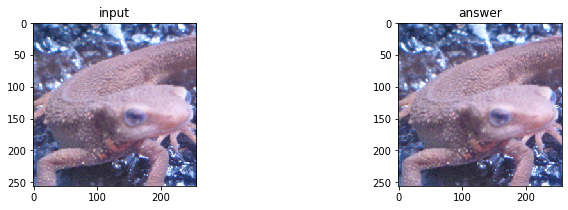

In [41]:
show_img_input_and_answer(img_orig, img_hsv_to_rgb)

In [42]:
img_hsv_to_rgb

Array([[[ 46,  81, 137],
        [ 43,  79, 115],
        [ 36,  50,  89],
        ...,
        [ 84,  84, 122],
        [120, 115, 145],
        [148, 144, 169]],

       [[ 69,  92, 134],
        [ 59,  83, 121],
        [ 43,  47,  92],
        ...,
        [ 79,  90, 136],
        [102, 113, 158],
        [119, 132, 177]],

       [[ 74,  94, 144],
        [ 60,  81, 138],
        [ 51,  56, 112],
        ...,
        [104, 111, 165],
        [ 90, 101, 163],
        [ 89, 104, 171]],

       ...,

       [[169, 214, 255],
        [134, 192, 240],
        [ 91, 132, 196],
        ...,
        [ 42,  63, 128],
        [ 37,  62, 116],
        [ 35,  63, 110]],

       [[119, 174, 241],
        [ 96, 149, 219],
        [ 89, 121, 198],
        ...,
        [ 52,  71, 129],
        [ 46,  69, 123],
        [ 43,  69, 120]],

       [[ 96, 137, 201],
        [114, 131, 200],
        [111, 114, 181],
        ...,
        [ 66,  80, 141],
        [ 51,  69, 135],
        [ 52,  71, 140]]

In [43]:
img_orig

Array([[[ 46,  81, 137],
        [ 43,  79, 115],
        [ 36,  50,  89],
        ...,
        [ 84,  84, 122],
        [120, 115, 145],
        [148, 144, 169]],

       [[ 69,  92, 134],
        [ 59,  83, 121],
        [ 43,  47,  92],
        ...,
        [ 79,  90, 136],
        [102, 113, 158],
        [119, 132, 177]],

       [[ 74,  94, 144],
        [ 60,  81, 138],
        [ 51,  56, 112],
        ...,
        [104, 111, 165],
        [ 90, 101, 163],
        [ 89, 104, 171]],

       ...,

       [[169, 214, 255],
        [134, 192, 240],
        [ 91, 132, 196],
        ...,
        [ 42,  63, 128],
        [ 37,  62, 116],
        [ 35,  63, 110]],

       [[119, 174, 241],
        [ 96, 149, 219],
        [ 89, 121, 198],
        ...,
        [ 52,  71, 129],
        [ 46,  69, 123],
        [ 43,  69, 120]],

       [[ 96, 137, 201],
        [114, 131, 200],
        [111, 114, 181],
        ...,
        [ 66,  80, 141],
        [ 51,  69, 135],
        [ 52,  71, 140]]

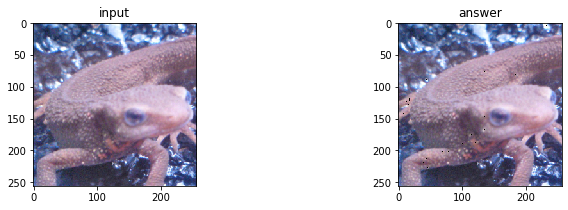

In [12]:
# answer
def RGB2HSV(img):
    _img = img.copy().astype(np.float32)# / 255
    v_max = _img.max(axis=2)
    v_min = _img.min(axis=2)
    v_argmin = _img.argmin(axis=2)
    hsv = np.zeros_like(_img, dtype=np.float32)
    r, g, b = np.split(_img, 3, axis=2)
    r, g, b = r[..., 0], g[..., 0], b[..., 0]

    diff = np.maximum(v_max - v_min, 1e-10)
    
    # Hue
    ind = v_argmin == 2
    hsv[..., 0][ind] = 60 * (g - r)[ind] / diff[ind] + 60
    ind = v_argmin == 0
    hsv[..., 0][ind] = 60 * (b - g)[ind] / diff[ind] + 180
    ind = v_argmin == 1
    hsv[..., 0][ind] = 60 * (r - b)[ind] / diff[ind] + 300
    ind = v_max == v_min
    hsv[..., 0][ind] = 0
    # Saturation
    hsv[..., 1] = v_max - v_min
    # Value
    hsv[..., 2] = v_max
    return hsv

def HSV2RGB(hsv):
    h, s, v = np.split(hsv, 3, axis=2)
    h, s, v = h[..., 0], s[..., 0], v[..., 0]
    _h = h / 60
    x = s * (1 - np.abs(_h % 2 - 1))
    z = np.zeros_like(x)
    vals = np.array([[s, x, z], [x, s, z], [z, s, x], [z, x, s], [x, z, s], [s, z, x]])
    
    img = np.zeros_like(hsv)
    
    for i in range(6):
        ind = _h.astype(int) == i
        for j in range(3):
            img[..., j][ind] = (v - s)[ind] + vals[i, j][ind]
            
    return np.clip(img, 0, 255).astype(np.uint8)
   
hsv = RGB2HSV(img_orig) # RGB -> HSV
# hsv[..., 0] = (hsv[..., 0] + 180) % 360 # Hue of opencv is defined [0, 180]
img_hsv = HSV2RGB(hsv) # HSV -> RGB
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_hsv)
plt.show()

In [13]:
hsv = RGB2HSV(img_orig) # RGB -> HSV
hsv

Array([[[216.92308,  91.     , 137.     ],
        [210.     ,  72.     , 115.     ],
        [224.15094,  53.     ,  89.     ],
        ...,
        [240.     ,  38.     , 122.     ],
        [250.     ,  30.     , 145.     ],
        [249.6    ,  25.     , 169.     ]],

       [[218.76923,  65.     , 134.     ],
        [216.7742 ,  62.     , 121.     ],
        [235.10204,  49.     ,  92.     ],
        ...,
        [228.42105,  57.     , 136.     ],
        [228.2143 ,  56.     , 158.     ],
        [226.55173,  58.     , 177.     ]],

       [[222.85715,  70.     , 144.     ],
        [223.84616,  78.     , 138.     ],
        [235.08197,  61.     , 112.     ],
        ...,
        [233.11475,  61.     , 165.     ],
        [230.95891,  73.     , 163.     ],
        [229.02438,  82.     , 171.     ]],

       ...,

       [[208.60464,  86.     , 255.     ],
        [207.16982, 106.     , 240.     ],
        [216.57143, 105.     , 196.     ],
        ...,
        [225.34885,  86.  

In [25]:
img_hsv

Array([[[216.92308,  91.     , 137.     ],
        [210.     ,  72.     , 115.     ],
        [224.15094,  53.     ,  89.     ],
        ...,
        [240.     ,  38.     , 122.     ],
        [250.     ,  30.     , 145.     ],
        [249.6    ,  25.     , 169.     ]],

       [[218.76923,  65.     , 134.     ],
        [216.7742 ,  62.     , 121.     ],
        [235.10204,  49.     ,  92.     ],
        ...,
        [228.42105,  57.     , 136.     ],
        [228.2143 ,  56.     , 158.     ],
        [226.55173,  58.     , 177.     ]],

       [[222.85715,  70.     , 144.     ],
        [223.84616,  78.     , 138.     ],
        [235.08197,  61.     , 112.     ],
        ...,
        [233.11475,  61.     , 165.     ],
        [230.95891,  73.     , 163.     ],
        [229.02438,  82.     , 171.     ]],

       ...,

       [[208.60464,  86.     , 255.     ],
        [207.16982, 106.     , 240.     ],
        [216.57143, 105.     , 196.     ],
        ...,
        [225.34885,  86.  

In [23]:
def rgb_to_hsv(img):
    hsv = img.copy().astype('float32')
    rl = hsv[:, :, 0].copy()
    gl = hsv[:, :, 1].copy()
    bl = hsv[:, :, 2].copy()
    
    vmax = np.maximum(bl, np.maximum(gl, rl))
    vmin = np.minimum(bl, np.minimum(gl, rl))
    
    max_equal_min = (vmax == vmin)
    diff = np.maximum((vmax - vmin).astype('float32'), 1e-10)
    
    index = (max_equal_min == False) * (gl == vmin)
    hsv[:, :, 0][index] = 60 * (rl - bl)[index] / diff[index] + 300
    index = (max_equal_min == False) * (rl == vmin)
    hsv[:, :, 0][index] = 60 * (bl - gl)[index] / diff[index] + 180
    index = (max_equal_min == False) * (bl == vmin)
    hsv[:, :, 0][index] = 60 * (gl - rl)[index] / diff[index] + 60
    index = max_equal_min
    hsv[:, :, 0][index] = 0
    
    hsv[:, :, 1] = vmax - vmin
    hsv[:, :, 2] = vmax
    return hsv

In [24]:
img_hsv = rgb_to_hsv(img_orig)

In [47]:
sum(sum(img_orig != img_hsv_to_rgb))

Array([0, 0, 0])

In [44]:
img_hsv_to_rgb

Array([[[ 46,  81, 137],
        [ 43,  79, 115],
        [ 36,  50,  89],
        ...,
        [ 84,  84, 122],
        [120, 115, 145],
        [148, 144, 169]],

       [[ 69,  92, 134],
        [ 59,  83, 121],
        [ 43,  47,  92],
        ...,
        [ 79,  90, 136],
        [102, 113, 158],
        [119, 132, 177]],

       [[ 74,  94, 144],
        [ 60,  81, 138],
        [ 51,  56, 112],
        ...,
        [104, 111, 165],
        [ 90, 101, 163],
        [ 89, 104, 171]],

       ...,

       [[169, 214, 255],
        [134, 192, 240],
        [ 91, 132, 196],
        ...,
        [ 42,  63, 128],
        [ 37,  62, 116],
        [ 35,  63, 110]],

       [[119, 174, 241],
        [ 96, 149, 219],
        [ 89, 121, 198],
        ...,
        [ 52,  71, 129],
        [ 46,  69, 123],
        [ 43,  69, 120]],

       [[ 96, 137, 201],
        [114, 131, 200],
        [111, 114, 181],
        ...,
        [ 66,  80, 141],
        [ 51,  69, 135],
        [ 52,  71, 140]]

In [45]:
img_orig

Array([[[ 46,  81, 137],
        [ 43,  79, 115],
        [ 36,  50,  89],
        ...,
        [ 84,  84, 122],
        [120, 115, 145],
        [148, 144, 169]],

       [[ 69,  92, 134],
        [ 59,  83, 121],
        [ 43,  47,  92],
        ...,
        [ 79,  90, 136],
        [102, 113, 158],
        [119, 132, 177]],

       [[ 74,  94, 144],
        [ 60,  81, 138],
        [ 51,  56, 112],
        ...,
        [104, 111, 165],
        [ 90, 101, 163],
        [ 89, 104, 171]],

       ...,

       [[169, 214, 255],
        [134, 192, 240],
        [ 91, 132, 196],
        ...,
        [ 42,  63, 128],
        [ 37,  62, 116],
        [ 35,  63, 110]],

       [[119, 174, 241],
        [ 96, 149, 219],
        [ 89, 121, 198],
        ...,
        [ 52,  71, 129],
        [ 46,  69, 123],
        [ 43,  69, 120]],

       [[ 96, 137, 201],
        [114, 131, 200],
        [111, 114, 181],
        ...,
        [ 66,  80, 141],
        [ 51,  69, 135],
        [ 52,  71, 140]]

In [46]:
[img_orig != img_hsv_to_rgb]

[Array([[[False, False, False],
         [False, False, False],
         [False, False, False],
         ...,
         [False, False, False],
         [False, False, False],
         [False, False, False]],
 
        [[False, False, False],
         [False, False, False],
         [False, False, False],
         ...,
         [False, False, False],
         [False, False, False],
         [False, False, False]],
 
        [[False, False, False],
         [False, False, False],
         [False, False, False],
         ...,
         [False, False, False],
         [False, False, False],
         [False, False, False]],
 
        ...,
 
        [[False, False, False],
         [False, False, False],
         [False, False, False],
         ...,
         [False, False, False],
         [False, False, False],
         [False, False, False]],
 
        [[False, False, False],
         [False, False, False],
         [False, False, False],
         ...,
         [False, False, False],
       

### Q.5.my_ans

In [54]:
def rgb_to_hsv(img):
    hsv = img.copy().astype('float32')
    rl = hsv[:, :, 0].copy()
    gl = hsv[:, :, 1].copy()
    bl = hsv[:, :, 2].copy()
    
    vmax = np.maximum(bl, np.maximum(gl, rl))
    vmin = np.minimum(bl, np.minimum(gl, rl))
    
    max_equal_min = (vmax == vmin)
    diff = np.maximum((vmax - vmin).astype('float32'), 1e-10)
    
    index = (max_equal_min == False) * (gl == vmin)
    hsv[:, :, 0][index] = 60 * (rl - bl)[index] / diff[index] + 300
    index = (max_equal_min == False) * (rl == vmin)
    hsv[:, :, 0][index] = 60 * (bl - gl)[index] / diff[index] + 180
    index = (max_equal_min == False) * (bl == vmin)
    hsv[:, :, 0][index] = 60 * (gl - rl)[index] / diff[index] + 60
    index = max_equal_min
    hsv[:, :, 0][index] = 0
    
    hsv[:, :, 1] = vmax - vmin
    hsv[:, :, 2] = vmax
    return hsv

In [59]:
def hsv_to_rgb(hsv):
    img = hsv.copy()
    h = img[:, :, 0].copy()
    s = img[:, :, 1].copy()
    v = img[:, :, 2].copy()
    
    h2 = h / 60
    x = (s * (1 - np.abs(h2 % 2 - 1)))
    
    img[:, :, 0] = v - s
    img[:, :, 1] = v - s
    img[:, :, 2] = v - s
    
    index = (h2 < 1)
    img[:, :, 0][index] += s[index]
    img[:, :, 1][index] += x[index]
    index = (1 <= h2) * (h2 < 2)
    img[:, :, 0][index] += x[index]
    img[:, :, 1][index] += s[index]
    index = (2 <= h2) * (h2 < 3)
    img[:, :, 1][index] += s[index]
    img[:, :, 2][index] += x[index]
    index = (3 <= h2) * (h2 < 4)
    img[:, :, 1][index] += x[index]
    img[:, :, 2][index] += s[index]
    index = (4 <= h2) * (h2 < 5)
    img[:, :, 0][index] += x[index]
    img[:, :, 2][index] += s[index]
    index = 5 <= h2
    img[:, :, 0][index] += s[index]
    img[:, :, 2][index] += x[index]
    
    return np.clip(np.round(img), 0, 255).astype('uint8')

In [60]:
def turn_hsv(img):
    hsv = rgb_to_hsv(img)
    hsv[:, :, 0] = (hsv[:, :, 0] + 180) % 360
    return hsv_to_rgb(hsv)

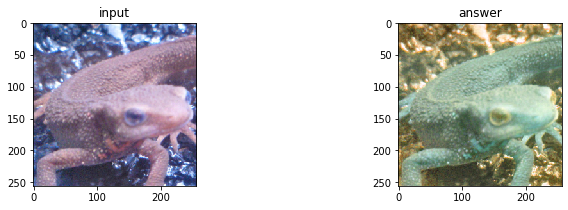

In [61]:
show_img_input_and_answer(img_orig, turn_hsv(img_orig))

### Q.5.opencv

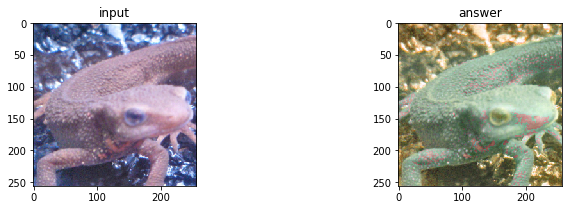

In [52]:
# opencv
hsv = cv2.cvtColor(img_orig, cv2.COLOR_RGB2HSV) # RGB -> HSV
hsv[..., 0] = (hsv[..., 0] + 90) % 180 # Hue of opencv is defined [0, 180]
img_hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB) # HSV -> RGB
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_hsv)
plt.show()

### Q.5.ans

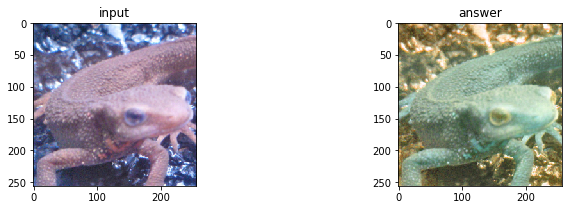

In [62]:
# answer
def RGB2HSV(img):
    _img = img.copy().astype(np.float32)# / 255
    v_max = _img.max(axis=2)
    v_min = _img.min(axis=2)
    v_argmin = _img.argmin(axis=2)
    hsv = np.zeros_like(_img, dtype=np.float32)
    r, g, b = np.split(_img, 3, axis=2)
    r, g, b = r[..., 0], g[..., 0], b[..., 0]

    diff = np.maximum(v_max - v_min, 1e-10)
    
    # Hue
    ind = v_argmin == 2
    hsv[..., 0][ind] = 60 * (g - r)[ind] / diff[ind] + 60
    ind = v_argmin == 0
    hsv[..., 0][ind] = 60 * (b - g)[ind] / diff[ind] + 180
    ind = v_argmin == 1
    hsv[..., 0][ind] = 60 * (r - b)[ind] / diff[ind] + 300
    ind = v_max == v_min
    hsv[..., 0][ind] = 0
    # Saturation
    hsv[..., 1] = v_max - v_min
    # Value
    hsv[..., 2] = v_max
    return hsv

def HSV2RGB(hsv):
    h, s, v = np.split(hsv, 3, axis=2)
    h, s, v = h[..., 0], s[..., 0], v[..., 0]
    _h = h / 60
    x = s * (1 - np.abs(_h % 2 - 1))
    z = np.zeros_like(x)
    vals = np.array([[s, x, z], [x, s, z], [z, s, x], [z, x, s], [x, z, s], [s, z, x]])
    
    img = np.zeros_like(hsv)
    
    for i in range(6):
        ind = _h.astype(int) == i
        for j in range(3):
            img[..., j][ind] = (v - s)[ind] + vals[i, j][ind]
            
    return np.clip(img, 0, 255).astype(np.uint8)
   
hsv = RGB2HSV(img_orig) # RGB -> HSV
hsv[..., 0] = (hsv[..., 0] + 180) % 360 # Hue of opencv is defined [0, 180]
img_hsv = HSV2RGB(hsv) # HSV -> RGB
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_hsv)
plt.show()

### Q.5.ans2

C:\Users\suzuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\suzuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in remainder
C:\Users\suzuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in remainder
C:\Users\suzuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\suzuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in less


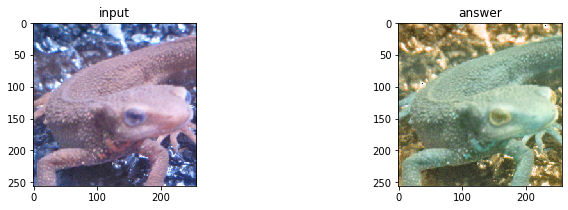

In [64]:
def BGR2HSV(_img):
	img = _img.copy() / 255.

	hsv = np.zeros_like(img, dtype=np.float32)

	# get max and min
	max_v = np.max(img, axis=2).copy()
	min_v = np.min(img, axis=2).copy()
	min_arg = np.argmin(img, axis=2)

	# H
	hsv[..., 0][np.where(max_v == min_v)]= 0
	## if min == B
	ind = np.where(min_arg == 0)
	hsv[..., 0][ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
	## if min == R
	ind = np.where(min_arg == 2)
	hsv[..., 0][ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
	## if min == G
	ind = np.where(min_arg == 1)
	hsv[..., 0][ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300
		
	# S
	hsv[..., 1] = max_v.copy() - min_v.copy()

	# V
	hsv[..., 2] = max_v.copy()
	
	return hsv


def HSV2BGR(_img, hsv):
	img = _img.copy() / 255.

	# get max and min
	max_v = np.max(img, axis=2).copy()
	min_v = np.min(img, axis=2).copy()

	out = np.zeros_like(img)

	H = hsv[..., 0]
	S = hsv[..., 1]
	V = hsv[..., 2]

	C = S
	H_ = H / 60.
	X = C * (1 - np.abs( H_ % 2 - 1))
	Z = np.zeros_like(H)

	vals = [[Z,X,C], [Z,C,X], [X,C,Z], [C,X,Z], [C,Z,X], [X,Z,C]]

	for i in range(6):
		ind = np.where((i <= H_) & (H_ < (i+1)))
		out[..., 0][ind] = (V - C)[ind] + vals[i][0][ind]
		out[..., 1][ind] = (V - C)[ind] + vals[i][1][ind]
		out[..., 2][ind] = (V - C)[ind] + vals[i][2][ind]

	out[np.where(max_v == min_v)] = 0
	out = np.clip(out, 0, 1)
	out = (out * 255).astype(np.uint8)

	return out


# Read image
img = img_orig.astype(np.float32)

# RGB > HSV
hsv = BGR2HSV(img)

# Transpose Hue
hsv[..., 0] = (hsv[..., 0] + 180) % 360

# HSV > RGB
out = HSV2BGR(img, hsv)

show_img_input_and_answer(img_orig, out)